<a href="https://colab.research.google.com/github/Gungtr4/University-project/blob/main/Analisis%20Sentimen/Analisis%20sentimen%20K-NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sastrawi

     |████████████████████████████████| 215kB 7.7MB/s 


In [ ]:
pip install nltk

In [ ]:
pip install swifter

     |████████████████████████████████| 634kB 8.6MB/s 
     |████████████████████████████████| 296kB 18.3MB/s 
     |████████████████████████████████| 583kB 28.8MB/s 
     |████████████████████████████████| 122kB 28.2MB/s 
     |████████████████████████████████| 48.5MB 77kB/s 
     |████████████████████████████████| 17.2MB 263kB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 1.3MB 25.0MB/s 
     |████████████████████████████████| 3.1MB 34.4MB/s 
     |████████████████████████████████| 133kB 48.8MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 204kB 51.3MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 296kB 51.4MB/s 
     |████████████████████████████████| 143kB 48.2MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
  Created wheel for swifter: filename=swifter-1.0.7-cp37-none-any.whl size=13993 sha256=9f68ea20b523ce7d2c84e068

In [ ]:
import pandas as pd
import numpy as np
import nltk
import math
nltk.download('punkt')
nltk.download('stopwords')
import string 
import re
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt 
from google.colab import files
uploaded = files.upload()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving dataset.txt to dataset.txt


In [ ]:
TWEET_DATA = pd.read_csv("dataset.txt", delimiter="\t")
TWEET_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [ ]:
TWEET_DATA['Tweet'] = TWEET_DATA['Tweet'].str.lower()

In [ ]:
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
TWEET_DATA['Tweet'] = TWEET_DATA['Tweet'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['Tweet'] = TWEET_DATA['Tweet'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['Tweet'] = TWEET_DATA['Tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['Tweet'] = TWEET_DATA['Tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['Tweet'] = TWEET_DATA['Tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['Tweet'] = TWEET_DATA['Tweet'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)
    
def freqDist_wrapper(text):
    return FreqDist(text)


TWEET_DATA['Tweet_tokens'] = TWEET_DATA['Tweet'].apply(word_tokenize_wrapper)
TWEET_DATA['Tweet_tokens_fdist'] = TWEET_DATA['Tweet_tokens'].apply(freqDist_wrapper)

In [ ]:
list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['Tweet_tokens_WSW'] = TWEET_DATA['Tweet_tokens'].apply(stopwords_removal) 

In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['Tweet_tokens_WSW']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
#print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
#print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['Tweet_tokens_stemmed'] = TWEET_DATA['Tweet_tokens_WSW'].swifter.apply(get_stemmed_term)
print(TWEET_DATA['Tweet_tokens_stemmed'])

------------------------
fadli : fadli
zon : zon
mendagri : mendagri
menonaktifkan : nonaktif
ahok : ahok
gubernur : gubernur
dki : dki
melukai : luka
aksi : aksi
rangka : rangka
memenjarakan : penjara
gagal : gagal
pilkada : pilkada
sylvi : sylvi
gurbernur : gurbernur
kekerasan : keras
perempuan : perempuan
buktinya : bukti
foto : foto
bareng : bareng
ahmad : ahmad
dhani : dhani
puas : puas
debat : debat
jalan : jalan
bekasi : bekas
terungkap : ungkap
waspada : waspada
ktp : ktp
palsukawal : palsukawal
bnyak : bnyak
agamis : agam
dibahas : bahas
tingkat : tingkat
keimanan : iman
sebatas : batas
maksud : maksud
pernyataan : nyata
mengaminkan : amin
kriminalisasi : kriminalisasi
hati : hati
jg : jg
mulutmu : mulut
integrasikan : integrasi
transportasi : transportasi
publik : publik
sistem : sistem
single : single
ticketing : ticketing
melawan : lawan
korupsi : korupsi
ibukota : ibukota
bangun : bangun
infrastruktur : infrastruktur
mencoba : coba
memperbaiki : baik
trobosan : trobosan
wo


0      [fadli, zon, mendagri, nonaktif, ahok, gubernu...
1      [luka, aksi, rangka, penjara, ahok, ahok, gaga...
2      [sylvi, gurbernur, keras, perempuan, bukti, fo...
3      [ahmad, dhani, puas, debat, pilkada, jalan, be...
4                    [waspada, ktp, palsukawal, pilkada]
                             ...                        
708              [muka, babi, ahok, serbet, lantai, btp]
709    [bang, hancur, merka, bang, musnah, china, bab...
710    [sapa, ahok, anti, korupsi, grombolannya, ngom...
711    [gw, ngimpi, sentilin, biji, babi, ahok, pceta...
712    [mudah, gw, ketemu, babi, iwan, bopeng, tps, a...
Name: Tweet_tokens_stemmed, Length: 713, dtype: object


In [ ]:
TWEET_DATA.to_csv("Text_Preprocessing.csv")

In [ ]:
Data_TW = pd.read_csv("Text_Preprocessing.csv", usecols=["Label", "Tweet_tokens_stemmed"])
Data_TW.columns = ["label", "tweet"]

Data_TW.head()

,label,tweet
0,Non_HS,"['fadli', 'zon', 'mendagri', 'nonaktif', 'ahok..."
1,Non_HS,"['luka', 'aksi', 'rangka', 'penjara', 'ahok', ..."
2,Non_HS,"['sylvi', 'gurbernur', 'keras', 'perempuan', '..."
3,Non_HS,"['ahmad', 'dhani', 'puas', 'debat', 'pilkada',..."
4,Non_HS,"['waspada', 'ktp', 'palsukawal', 'pilkada']"


In [ ]:
# Class count
count_class_0, count_class_1 = Data_TW.label.value_counts()

# Divide by class
df_class_0 = Data_TW[Data_TW['label'] == 'Non_HS']
df_class_1 = Data_TW[Data_TW['label'] == 'HS']
df_class_0.count()

label    453
tweet    453
dtype: int64

Random under-sampling:
Non_HS    260
HS        260
Name: label, dtype: int64


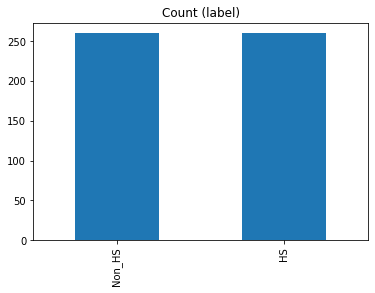

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
Data_TW = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(Data_TW.label.value_counts())

Data_TW.label.value_counts().plot(kind='bar', title='Count (label)');
Data_TW = Data_TW.reset_index()

In [ ]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

Data_TW["tweet_list"] = Data_TW["tweet"].apply(convert_text_list)


print(Data_TW["tweet_list"][90])

print("\ntype : ", type(Data_TW["tweet_list"][90]))

['sumarsono', 'gaya', 'ahok', 'kerja', 'keras', 'patut', 'contoh', 'bagus']

type :  <class 'list'>


In [ ]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

Data_TW["TF_dict"] = Data_TW['tweet_list'].apply(calc_TF)

In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(Data_TW["TF_dict"])
n_document = len(Data_TW)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
Data_TW["TF-IDF_dict"] = Data_TW["TF_dict"].apply(calc_TF_IDF)

In [ ]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)#[:32]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

Data_TW["TF_IDF_Vec"] = Data_TW["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(Data_TW["TF_IDF_Vec"][1])

print("\nmatrix size : ", len(Data_TW["TF_IDF_Vec"][1]))

print first row matrix TF_IDF_Vec Series

[0.09911386226705875, 0.0, 0.0, 0.22107775437409227, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.38559335387771027, 0.38559335387771027, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4174387269895637, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.430791866252016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4644390899141373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
# Vectors
def cos_sim(vec_a,vec_b):
  d1 = sum(vec_a*vec_b)
  d2 = math.sqrt(sum(vec_b*vec_b))
  sim = d1/d2
  return sim
score = []
for i in range(0,103):
  for j in range(0,415):
    vec_a = np.asarray(Case_TW['TF_IDF_Vec'][i])
    vec_b = np.array(Lib_TW['TF_IDF_Vec'][j])  
    score.append((i, j, cos_sim(vec_a,vec_b)))

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(X)
Lib_TW, Case_TW = train_test_split(Data_TW, test_size=0.2)
Lib_TW = Lib_TW.reset_index(drop=True)
Case_TW = Case_TW.reset_index(drop=True)
Data = pd.DataFrame(score, columns=('Case', 'Lib', 'Score'))

,index,label,tweet,tweet_list,TF_dict,TF-IDF_dict,TF_IDF_Vec
0,473,HS,"['tangkap', 'ahok', 'klompok', 'palsu', 'ktp',...","[tangkap, ahok, klompok, palsu, ktp, karna, pe...","{'tangkap': 0.1111111111111111, 'ahok': 0.1111...","{'tangkap': 0.5160434332379302, 'ahok': 0.1101...","[0.11012651363006526, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,89,Non_HS,"['ahok', 'janji', 'berani', 'tutup', 'hibur', ...","[ahok, janji, berani, tutup, hibur, malam, jua...","{'ahok': 0.125, 'janji': 0.125, 'berani': 0.12...","{'ahok': 0.12389232783382342, 'janji': 0.58054...","[0.12389232783382342, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,523,HS,"['kurang', 'daya', 'wanita', 'dki', 'jakarta',...","[kurang, daya, wanita, dki, jakarta, telak, be...","{'kurang': 0.07692307692307693, 'daya': 0.0769...","{'kurang': 0.4277447408473483, 'daya': 0.42774...","[0.0, 0.0, 0.0, 0.17005981105699405, 0.0, 0.0,..."
3,685,HS,"['ahok', 'cipta', 'bara', 'api', 'rakyat', 'pr...","[ahok, cipta, bara, api, rakyat, pribumi, tion...","{'ahok': 0.16666666666666666, 'cipta': 0.08333...","{'ahok': 0.1651897704450979, 'cipta': 0.405627...","[0.1651897704450979, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,478,HS,"['mbak', 'sylviana', 'please', 'sehat']","[mbak, sylviana, please, sehat]","{'mbak': 0.25, 'sylviana': 0.25, 'please': 0.2...","{'mbak': 1.2168836126138955, 'sylviana': 1.390...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
99,466,HS,"['hidup', 'china', 'komunis']","[hidup, china, komunis]","{'hidup': 0.3333333333333333, 'china': 0.33333...","{'hidup': 1.4359728875067197, 'china': 1.35220...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
100,651,HS,"['indonesia', 'dibully', 'org', 'beneryg', 'sa...","[indonesia, dibully, org, beneryg, salah, bina...","{'indonesia': 0.1, 'dibully': 0.1, 'org': 0.1,...","{'indonesia': 0.38559335387771027, 'dibully': ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
101,101,Non_HS,"['orang', 'bilang', 'makimaki', 'orang']","[orang, bilang, makimaki, orang]","{'orang': 0.5, 'bilang': 0.25, 'makimaki': 0.25}","{'orang': 1.4608121507001346, 'bilang': 1.3901...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
102,534,HS,"['mampuuss', 'tembak', 'dalem', 'banget', 'sil...","[mampuuss, tembak, dalem, banget, silvyy, lo, ...","{'mampuuss': 0.09090909090909091, 'tembak': 0....","{'mampuuss': 0.5055165119105025, 'tembak': 0.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
      

Data
  #print(similarity)
  #print3largest(similarity, len(similarity))
  #similarity = []
  #print('Case {} dengan Lib {}'.format(i,j), similarity)
  

,Case,Lib,Score
0,0,0,0.000000
1,0,1,0.020792
2,0,2,0.014097
3,0,3,0.208451
4,0,4,0.006592
...,...,...,...
42740,102,410,0.000000
42741,102,411,0.000000
42742,102,412,0.000000
42743,102,413,0.000000


In [ ]:
idx = Data.groupby('Case').apply(lambda x: x.nlargest(3, ['Score'])).reset_index(drop=True)
idx
#Data = Data.reset_index()

,Case,Lib,Score
0,0,394,0.289266
1,0,196,0.281291
2,0,274,0.241751
3,1,344,0.295393
4,1,107,0.237324
...,...,...,...
304,101,70,0.511074
305,101,21,0.445088
306,102,167,0.257359
307,102,229,0.252269


In [ ]:
index = idx['Lib']
label = []
for index in index:
  label.append((Lib_TW.at[index, 'label']))
idx['label'] = label
idx
#Data = Data.reset_index()

,Case,Lib,Score,label
0,0,394,0.289266,HS
1,0,196,0.281291,Non_HS
2,0,274,0.241751,Non_HS
3,1,344,0.295393,HS
4,1,107,0.237324,HS
...,...,...,...,...
304,101,70,0.511074,HS
305,101,21,0.445088,Non_HS
306,102,167,0.257359,HS
307,102,229,0.252269,HS


In [ ]:
count = idx.groupby(['Case','label']).size().reset_index(name='Size')
count

,Case,label,Size
0,0,HS,1
1,0,Non_HS,2
2,1,HS,2
3,1,Non_HS,1
4,2,HS,2
...,...,...,...
153,100,HS,2
154,100,Non_HS,1
155,101,HS,2
156,101,Non_HS,1


In [ ]:
for i in range(0,156):
  if count['Size'][i] <= 1 :
    count = count.drop(i)
count = count.reset_index(drop= 'true')
count

,Case,label,Size
0,0,Non_HS,2
1,1,HS,2
2,2,HS,2
3,3,HS,2
4,4,HS,2
...,...,...,...
99,99,HS,3
100,100,HS,2
101,101,HS,2
102,101,Non_HS,1


In [ ]:
count['Match'] = np.where(count['label'] == Case_TW['label'], 'True', 'False')

In [ ]:
count.groupby(['Match']).count()

,Case,label,Size
Match,,,
False,25,25,25
True,79,79,79
